In [162]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

import misc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
#dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset"

# Open-sky

In [260]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
acq_list = [f"A{i:d}" for i in range(1, 11)]
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [261]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [ ]:
# Load ULISS RINEX files
log_rinex = {}
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [291]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [ ]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['TEXTING'])

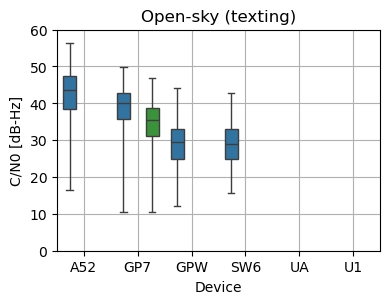

In [ ]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (texting)")
plt.gca().get_legend().remove()

## Swinging

In [ ]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING'])

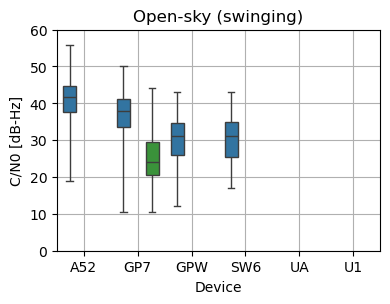

In [ ]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (swinging)")
plt.gca().get_legend().remove()

## Pocket

In [ ]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['POCKET'])

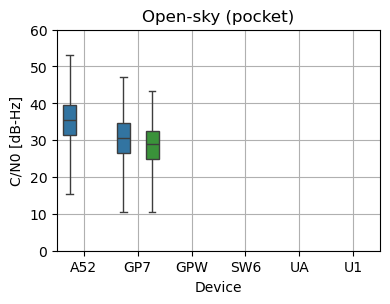

In [ ]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (pocket)")
plt.gca().get_legend().remove()

## Comparing CN0 between modes

In [262]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [263]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

Text(0.5, 1.0, 'Open-sky')

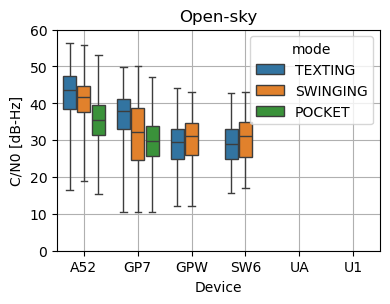

In [ ]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
#plt.gca().get_legend().remove()

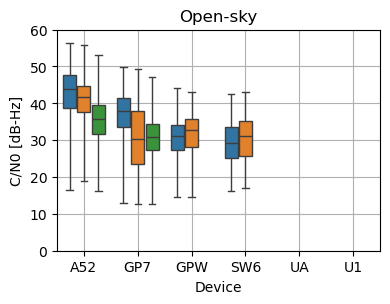

In [ ]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

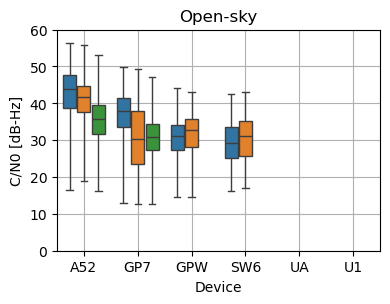

In [ ]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

## Comparing signal tracked between mode

In [319]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [320]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

In [338]:
# log = log_dict['GP7']
# log = log[log['acquisition'] == 'A8']
# _df = log[['TimeNanos', 'prn', 'acquisition', 'mode']]
# _df = _df.groupby(['acquisition', 'TimeNanos', 'mode']).nunique()
# _df = _df.reset_index().drop(columns=['acquisition', 'TimeNanos', 'mode'])
# _df.plot()
# plt.ylim((0, 60))

In [339]:
# log = log_dict_filtered['GP7']
# log = log[log['acquisition'] == 'A8']
# _df = log[['TimeNanos', 'prn', 'acquisition', 'mode']]
# _df = _df.groupby(['acquisition', 'TimeNanos', 'mode']).nunique()
# _df = _df.reset_index().drop(columns=['acquisition', 'TimeNanos', 'mode'])
# _df.plot()
# plt.ylim((0, 60))

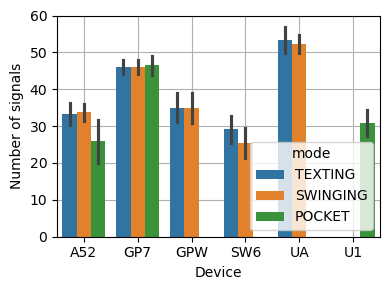

In [321]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

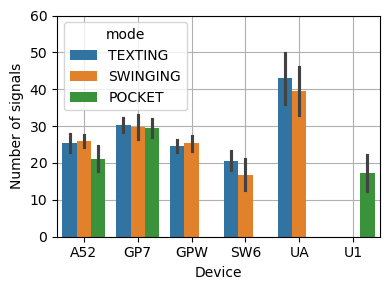

In [322]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

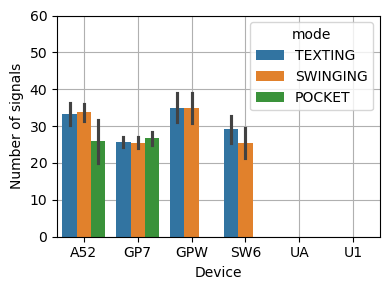

In [323]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

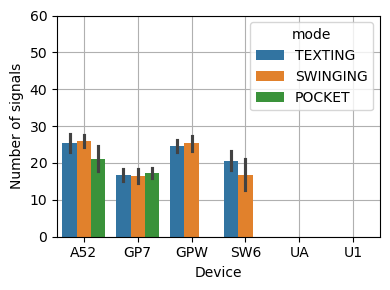

In [324]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Light indoor (train station)

In [356]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2', 'A3', 'A4']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [342]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey, 
                            indoor_only=True)

In [ ]:
# Load ULISS RINEX files
log_rinex = {}
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
                            indoor_only=True)

In [357]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [215]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['TEXTING'])

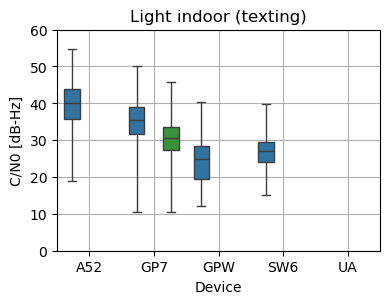

In [216]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (texting)")
plt.gca().get_legend().remove()

## Swinging

In [211]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING'])

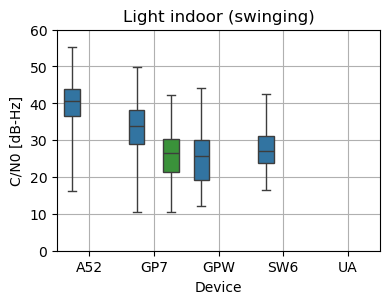

In [212]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (swinging)")
plt.gca().get_legend().remove()

## Pocket

In [191]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['POCKET'])

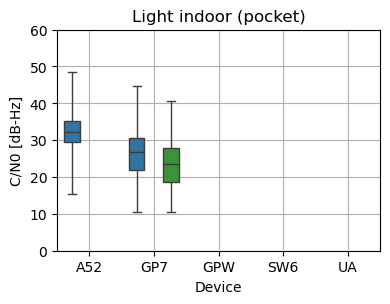

In [193]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (pocket)")
plt.gca().get_legend().remove()

## Comparing modes

In [217]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [218]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

Text(0.5, 1.0, 'Open-sky')

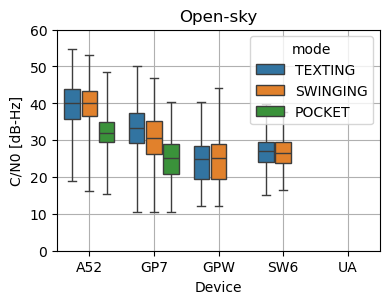

In [219]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
#plt.gca().get_legend().remove()

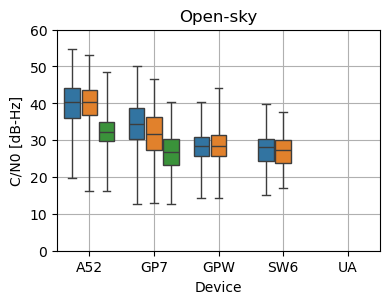

In [220]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

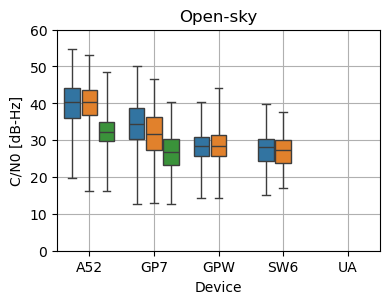

In [221]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

## Comparing number of satellites

In [358]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [359]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

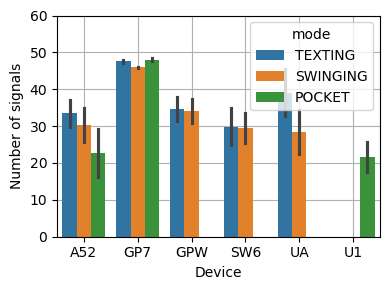

In [360]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

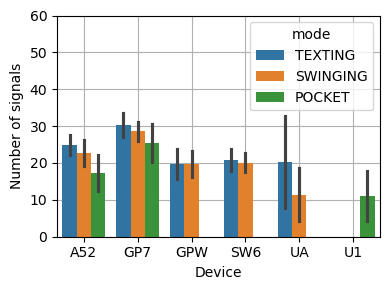

In [361]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

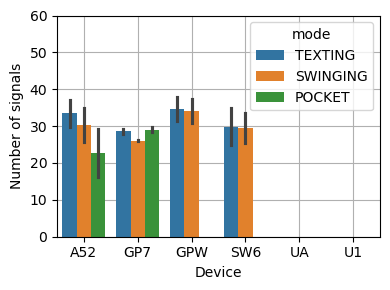

In [362]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

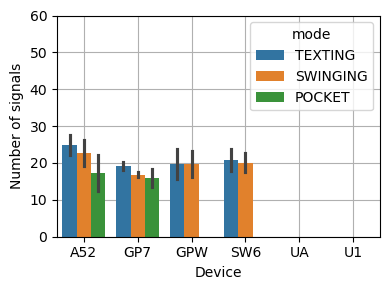

In [363]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Urban canyioning 

In [1]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

NameError: name 'dataset_path' is not defined

In [365]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [ ]:
# Load ULISS RINEX files
log_rinex = {}
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [374]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [229]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['TEXTING'])

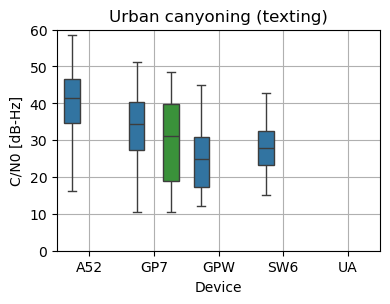

In [230]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (texting)")
plt.gca().get_legend().remove()

## Swinging
NOT APPLICABLE 

## Pocket

## Comparing modes

In [234]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [235]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

Text(0.5, 1.0, 'Open-sky')

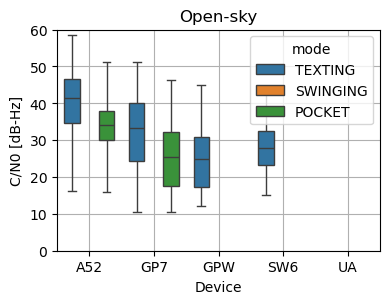

In [236]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
#plt.gca().get_legend().remove()

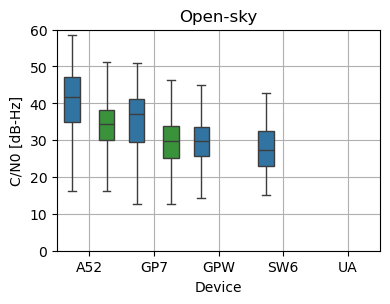

In [237]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

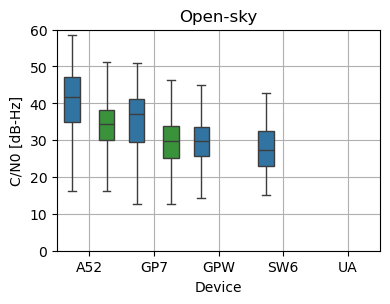

In [238]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

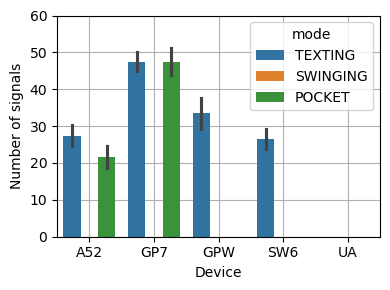

In [239]:
misc.plotBarPerMode(log_dict, device_android, device_uliss)

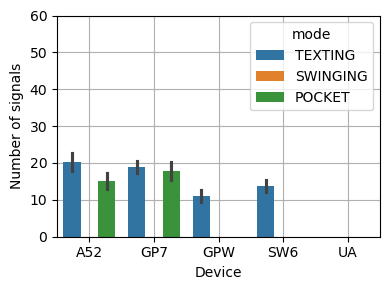

In [240]:
misc.plotBarPerMode(log_dict_filtered, device_android, device_uliss)

In [241]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['POCKET'])

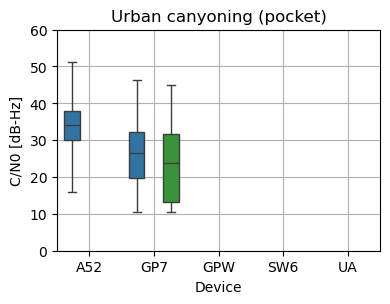

In [242]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (pocket)")
plt.gca().get_legend().remove()

## Comparing number of satellite between modes

In [375]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [376]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

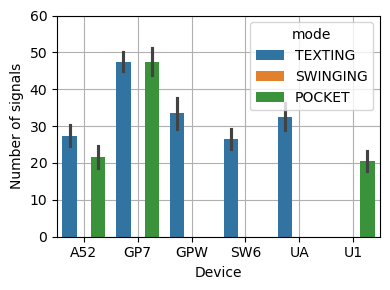

In [377]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

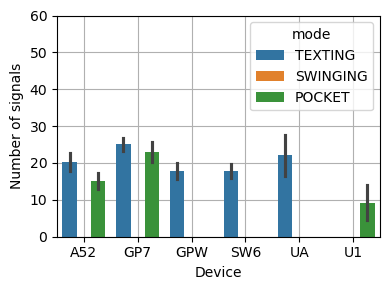

In [378]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

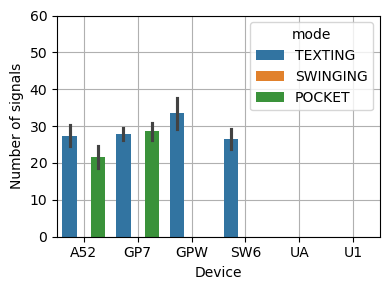

In [379]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

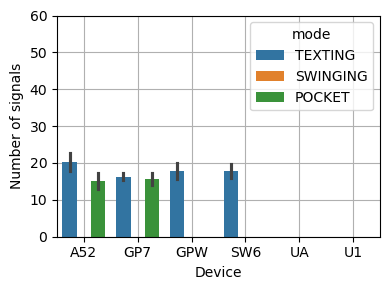

In [380]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)